In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('simulated_transaction_2024.csv')

# Initial data inspection
print("Original Data Size:", df.shape)

# List of critical columns where NaN values should be removed (excluding 'Third Party Account No' and 'Third Party Name')
critical_columns = ['Date', 'Timestamp', 'Account No', 'Balance', 'Amount']

# Remove rows where any critical column has NaN values
df = df.dropna(subset=critical_columns)

# Data inspection after cleaning
print("Cleaned Data Size:", df.shape)


# Display the first few rows of the cleaned dataframe
print(df.head())


C:\Users\carlo\AppData\Local\Temp\ipykernel_28536\3060989250.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Original Data Size: (230596, 7)
Cleaned Data Size: (229439, 7)
         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0                     NaN   

     Third Party Name  
0  Westport Care Home  
1    Barbiee Boutique  
2                 NaN  
3                 NaN  
4            Fat Face  


In [2]:
import pandas as pd

# Assuming df is already loaded and cleaned
# Add 'Income' and 'Outcome' columns
df['Income'] = df['Amount'].apply(lambda x: x if x > 0 else 0)
df['Outcome'] = df['Amount'].apply(lambda x: -x if x < 0 else 0)

#df.drop('Amount', axis=1, inplace=True)

# Check the first few rows to verify the new columns
print(df.head())

         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0                     NaN   

     Third Party Name  Income  Outcome  
0  Westport Care Home  1584.0      0.0  
1    Barbiee Boutique  1950.0      0.0  
2                 NaN     0.0    780.0  
3                 NaN   780.0      0.0  
4            Fat Face  1825.0      0.0  


In [3]:
import pandas as pd

# Load your dataset (assuming it's already loaded into 'df')
# df = pd.read_csv('simulated_transaction_2024.csv')

# 1. Correct 'Date' format to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# 2. Correct 'Timestamp' format - Assuming 'Timestamp' needs to be combined with 'Date'
# If 'Timestamp' is separate and only contains hour and minute, you might want to merge it with 'Date'
df['Timestamp'] = pd.to_timedelta(df['Timestamp'] + ':00')  # Adding seconds for full time format
df['Datetime'] = df['Date'] + df['Timestamp']  # Combines Date and Time into a full datetime

# Drop the now redundant 'Date' and 'Timestamp' columns if no longer needed
df.drop(['Date', 'Timestamp'], axis=1, inplace=True)

# 3. Convert 'Account No' from float with .0 to integer (removing decimal part)
df['Account No'] = df['Account No'].apply(lambda x: int(float(x)))


In [4]:
import pandas as pd

# Load your dataset (assuming it's already loaded into 'df')
# df = pd.read_csv('simulated_transaction_2024.csv')

# Assuming you have already executed the datetime conversion as described earlier
# Check the data type of 'Datetime' column
print("Data type of 'Datetime':", df['Datetime'].dtype)

# View the first few entries of the 'Datetime' column to check for time information
print(df['Datetime'].head().dt.strftime('%Y-%m-%d %H:%M:%S'))


Data type of 'Datetime': datetime64[ns]
0    2023-01-01 00:00:00
1    2023-01-01 00:00:00
2    2023-01-01 00:00:00
3    2023-01-01 00:00:00
4    2023-01-01 00:00:00
Name: Datetime, dtype: object


In [5]:
import pandas as pd

# Assuming df is already your cleaned DataFrame and includes a 'Datetime' column
# Convert 'Datetime' into separate 'Date' and 'Time' if needed, or directly use 'Datetime'

# 1. Day of the Week and Time of Day
df['Day of Week'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['Time of Day'] = df['Datetime'].dt.hour       # Hour of the day

# 2. Transaction Speed
# Sort data by Account No and Datetime to calculate differences
df.sort_values(by=['Account No', 'Datetime'], inplace=True)

# Calculate time differences between consecutive transactions for the same account
df['Time_Diff'] = df.groupby('Account No')['Datetime'].diff().dt.total_seconds().fillna(0)


# Example print to verify features
print(df[['Datetime', 'Day of Week', 'Time of Day', 'Time_Diff']].head())



                Datetime  Day of Week  Time of Day  Time_Diff
912  2023-01-01 00:00:00            6            0        0.0
4036 2023-01-01 00:00:00            6            0        0.0
4037 2023-01-01 00:00:00            6            0        0.0
4743 2023-01-01 09:37:00            6            9    34620.0
5133 2023-01-01 12:00:00            6           12     8580.0


## Explanation:
### Day of the Week and Time of Day:
 These features might help in detecting anomalies like transactions that occur at unusual times or on days when business activities are typically low.
### Transaction Speed:
 Calculating the seconds between transactions allows us to see if there are unusually quick consecutive transactions, which might be suspicious.
## Considerations:
Ensure that your data is properly sorted by Account No and Datetime before calculating differences, as this affects the correctness of features like Time_Diff. <br>
Handling of categorical features like Day of Week might require encoding techniques like one-hot encoding if used in machine learning models.

In [6]:
import pandas as pd

# Load your DataFrame (if not already loaded)
# df = pd.read_csv('your_data.csv')  # Make sure to use the path to your data

# Ensure 'Datetime' is a datetime object (if not already converted)
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create or verify the 'Date' column
df['Date'] = df['Datetime'].dt.date  # This extracts just the date part from 'Datetime'

# Now, you can safely create the 'Transaction Count'
df['Transaction Count'] = df.groupby(['Account No', 'Date'])['Amount'].transform('count')

# Proceed with other calculations
df['Month'] = df['Datetime'].dt.to_period('M')
df['Monthly Incoming'] = df[df['Amount'] > 0].groupby(['Account No', 'Month'])['Amount'].transform('sum')
df['Monthly Outgoing'] = df[df['Amount'] < 0].groupby(['Account No', 'Month'])['Amount'].transform('sum').abs()
df['Monthly Transaction Count'] = df.groupby(['Account No', 'Month'])['Amount'].transform('count')

df['30-Day Rolling Avg Amount'] = df.groupby('Account No')['Amount'].rolling(window=30, min_periods=1).mean().reset_index(level=0, drop=True)
df['30-Day Rolling Transaction Count Variance'] = df.groupby('Account No')['Transaction Count'].rolling(window=30, min_periods=1).var().reset_index(level=0, drop=True)

df['Balance After Transaction'] = df['Balance'] - df['Amount']
df['Monthly Unique Third Parties'] = df.groupby(['Account No', 'Month'])['Third Party Account No'].transform('nunique')

# Display a few rows to verify new features
print(df[['Account No', 'Date', 'Monthly Incoming', 'Monthly Outgoing', 'Monthly Transaction Count', 
          '30-Day Rolling Avg Amount', '30-Day Rolling Transaction Count Variance', 
          'Balance After Transaction', 'Monthly Unique Third Parties']].head())

      Account No        Date  Monthly Incoming  Monthly Outgoing  \
912    101531259  2023-01-01               NaN           2241.03   
4036   101531259  2023-01-01               NaN           2241.03   
4037   101531259  2023-01-01               NaN           2241.03   
4743   101531259  2023-01-01               NaN           2241.03   
5133   101531259  2023-01-01               NaN           2241.03   

      Monthly Transaction Count  30-Day Rolling Avg Amount  \
912                          18                  -859.0000   
4036                         18                  -433.4950   
4037                         18                  -322.3300   
4743                         18                  -261.7475   
5133                         18                  -246.1980   

      30-Day Rolling Transaction Count Variance  Balance After Transaction  \
912                                         NaN                     983.00   
4036                                        0.0               

In [7]:
import pandas as pd

# Assuming df is already your DataFrame and includes a 'Datetime' column

# Monthly Aggregates
df['Month'] = df['Datetime'].dt.month
df['Monthly Income'] = df[df['Amount'] > 0].groupby(['Account No', 'Month'])['Amount'].transform('sum')
df['Monthly Outcome'] = df[df['Amount'] < 0].groupby(['Account No', 'Month'])['Amount'].transform('sum').abs()

# Quarterly Aggregates
df['Quarter'] = df['Datetime'].dt.quarter
df['Quarterly Income'] = df[df['Amount'] > 0].groupby(['Account No', 'Quarter'])['Amount'].transform('sum')
df['Quarterly Outcome'] = df[df['Amount'] < 0].groupby(['Account No', 'Quarter'])['Amount'].transform('sum').abs()

# Seasonal Patterns (assuming Northern Hemisphere seasons)
df['Season'] = df['Datetime'].dt.month % 12 // 3 + 1
df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Rolling Metrics Over Longer Windows
df['90-Day Rolling Avg Amount'] = df.groupby('Account No')['Amount'].rolling(window=90, min_periods=1).mean().reset_index(level=0, drop=True)

# Display a few rows to verify new features
print(df[['Datetime', 'Month', 'Monthly Income', 'Monthly Outcome', 'Quarter', 'Quarterly Income', 'Quarterly Outcome', 'Season', '90-Day Rolling Avg Amount']].head())


                Datetime  Month  Monthly Income  Monthly Outcome  Quarter  \
912  2023-01-01 00:00:00      1             NaN          2241.03        1   
4036 2023-01-01 00:00:00      1             NaN          2241.03        1   
4037 2023-01-01 00:00:00      1             NaN          2241.03        1   
4743 2023-01-01 09:37:00      1             NaN          2241.03        1   
5133 2023-01-01 12:00:00      1             NaN          2241.03        1   

      Quarterly Income  Quarterly Outcome  Season  90-Day Rolling Avg Amount  
912                NaN            4610.41  Winter                  -859.0000  
4036               NaN            4610.41  Winter                  -433.4950  
4037               NaN            4610.41  Winter                  -322.3300  
4743               NaN            4610.41  Winter                  -261.7475  
5133               NaN            4610.41  Winter                  -246.1980  


In [8]:
import pandas as pd

# Assuming df is already your DataFrame and includes necessary columns like 'Amount', 'Datetime', etc.

# 1. High Volume Transactions
# Define a threshold for high volume, e.g., more than 3 standard deviations from the mean
mean_amount = df['Amount'].mean()
std_amount = df['Amount'].std()
threshold_high_volume = mean_amount + 3 * std_amount
df['High Volume Transaction'] = df['Amount'].apply(lambda x: 1 if abs(x) > threshold_high_volume else 0)

# 2. Frequent Small Transactions
# Define small transactions as those below a certain threshold, here assumed as the 10th percentile of transaction amounts
small_transaction_threshold = df['Amount'].quantile(0.1)
# Count the number of small transactions per day per account
df['Small Transaction Count'] = df[df['Amount'] <= small_transaction_threshold].groupby(['Account No', 'Date'])['Amount'].transform('count')

# 3. Unusual Time of Transaction
# Assuming 'hour' is a reasonable definition of unusual times (e.g., between midnight and 5AM)
df['Unusual Time Transaction'] = df['Datetime'].dt.hour.apply(lambda x: 1 if x < 6 else 0)

# 4. New Third Party
# Check for first occurrence of a third party for each account
df.sort_values(by=['Account No', 'Datetime'], inplace=True)
df['First Time Third Party'] = ~df['Third Party Account No'].duplicated(keep='first')
df['New Third Party Transaction'] = df.groupby('Account No')['First Time Third Party'].transform('max')

# Display a few rows to verify anomaly flags
print(df[['Account No', 'Amount', 'High Volume Transaction', 'Small Transaction Count', 'Unusual Time Transaction', 'New Third Party Transaction']].head())


      Account No  Amount  High Volume Transaction  Small Transaction Count  \
912    101531259 -859.00                        0                      3.0   
4036   101531259   -7.99                        0                      NaN   
4037   101531259 -100.00                        0                      NaN   
4743   101531259  -80.00                        0                      NaN   
5133   101531259 -184.00                        0                      3.0   

      Unusual Time Transaction  New Third Party Transaction  
912                          1                         True  
4036                         1                         True  
4037                         1                         True  
4743                         0                         True  
5133                         0                         True  


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is already your DataFrame and includes necessary columns like 'Amount', 'Datetime', etc.

# 1. Z-Score for Amounts
# Calculate the z-score of transaction amounts for each account
df['Amount Z-Score'] = df.groupby('Account No')['Amount'].transform(lambda x: zscore(x, ddof=1))

# Flag transactions where the absolute z-score is greater than 3 (common threshold for outliers)
df['Amount Outlier'] = df['Amount Z-Score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# 2. Interquartile Range (IQR) for Amounts
# Calculate IQR and determine outliers for each account
Q1 = df.groupby('Account No')['Amount'].transform(lambda x: x.quantile(0.25))
Q3 = df.groupby('Account No')['Amount'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
df['Lower Bound'] = Q1 - 1.5 * IQR
df['Upper Bound'] = Q3 + 1.5 * IQR
df['IQR Outlier'] = df.apply(lambda x: 1 if x['Amount'] < x['Lower Bound'] or x['Amount'] > x['Upper Bound'] else 0, axis=1)

# 3. Seasonal Decomposition of Transaction Amounts
# Make sure your date index is set properly
df['Date'] = pd.to_datetime(df['Datetime']).dt.date
df_daily_sum = df.groupby('Date')['Amount'].sum().reset_index()
df_daily_sum.set_index('Date', inplace=True)
df_daily_sum.index = pd.to_datetime(df_daily_sum.index)

# Assuming a shorter period might fit your actual data length
period = 91  # Adjusting to a quarterly period to fit the data length
if len(df_daily_sum) >= 2 * period:
    result = seasonal_decompose(df_daily_sum['Amount'], model='additive', period=period)
    df_daily_sum['seasonal'] = result.seasonal
    df_daily_sum['trend'] = result.trend
    df_daily_sum['resid'] = result.resid
    df_daily_sum['resid_outlier'] = df_daily_sum['resid'].apply(lambda x: 1 if abs(x) > np.std(df_daily_sum['resid']) * 3 else 0)

    print(df_daily_sum[['seasonal', 'trend', 'resid', 'resid_outlier']].head())
else:
    print("Not enough data for seasonal decomposition with the specified period.")

# Display a few rows to verify statistical flags
print(df[['Account No', 'Amount', 'Amount Z-Score', 'Amount Outlier', 'IQR Outlier']].head())


                seasonal  trend  resid  resid_outlier
Date                                                 
2023-01-01  22577.745307    NaN    NaN              0
2023-01-02 -41324.838649    NaN    NaN              0
2023-01-03 -33209.571579    NaN    NaN              0
2023-01-04 -32637.054510    NaN    NaN              0
2023-01-05 -32681.712165    NaN    NaN              0
      Account No  Amount  Amount Z-Score  Amount Outlier  IQR Outlier
912    101531259 -859.00       -1.561092               0            1
4036   101531259   -7.99       -0.004636               0            0
4037   101531259 -100.00       -0.172918               0            0
4743   101531259  -80.00       -0.136339               0            0
5133   101531259 -184.00       -0.326550               0            0


In [10]:
# Print the current column names in the DataFrame
print("Current DataFrame columns:", df.columns.tolist())

Current DataFrame columns: ['Account No', 'Balance', 'Amount', 'Third Party Account No', 'Third Party Name', 'Income', 'Outcome', 'Datetime', 'Day of Week', 'Time of Day', 'Time_Diff', 'Date', 'Transaction Count', 'Month', 'Monthly Incoming', 'Monthly Outgoing', 'Monthly Transaction Count', '30-Day Rolling Avg Amount', '30-Day Rolling Transaction Count Variance', 'Balance After Transaction', 'Monthly Unique Third Parties', 'Monthly Income', 'Monthly Outcome', 'Quarter', 'Quarterly Income', 'Quarterly Outcome', 'Season', '90-Day Rolling Avg Amount', 'High Volume Transaction', 'Small Transaction Count', 'Unusual Time Transaction', 'First Time Third Party', 'New Third Party Transaction', 'Amount Z-Score', 'Amount Outlier', 'Lower Bound', 'Upper Bound', 'IQR Outlier']


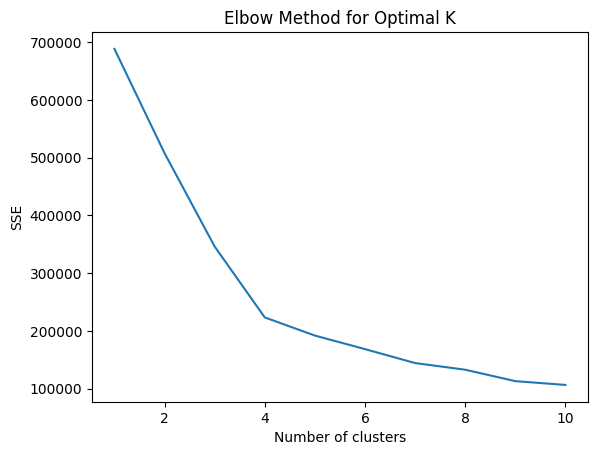

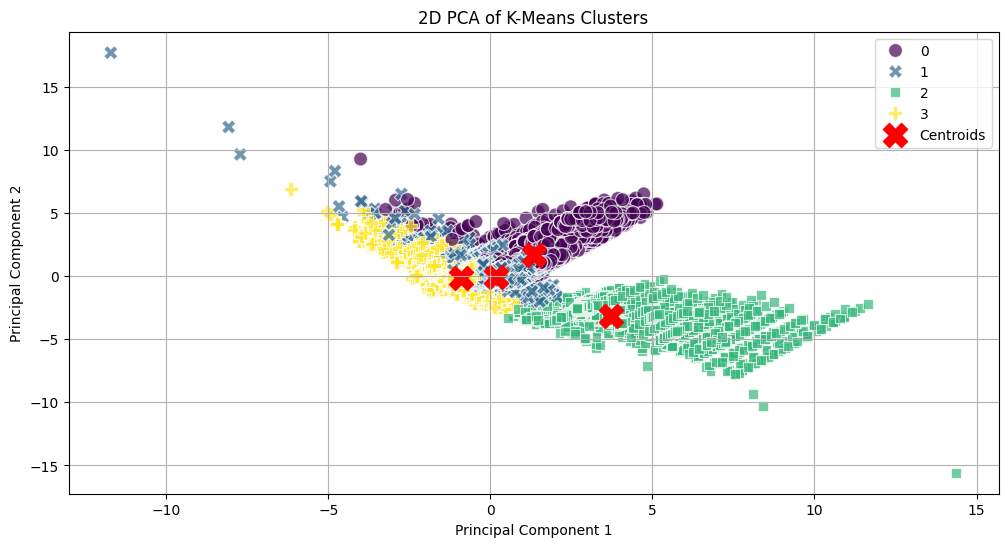

C:\Users\carlo\AppData\Local\Temp\ipykernel_28536\264615221.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


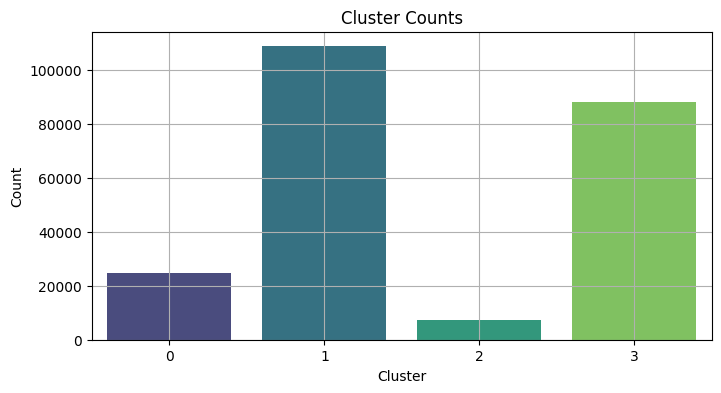

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Assuming 'df' has been previously loaded and prepared with all necessary features
features = ['Balance', 'Amount', 'Time of Day']
X = df[features].fillna(0)  # Handle potential NaNs in feature columns

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters for K-Means using the elbow method
sse = {}
for k in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse[k] = kmeans.inertia_  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

# Assuming optimal_clusters based on the elbow plot
optimal_clusters = 4  # Example, set this based on your observation from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7, style=df['Cluster'])
plt.title('2D PCA of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)

# Plotting cluster centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.legend()

plt.show()

# Display cluster counts in a bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()


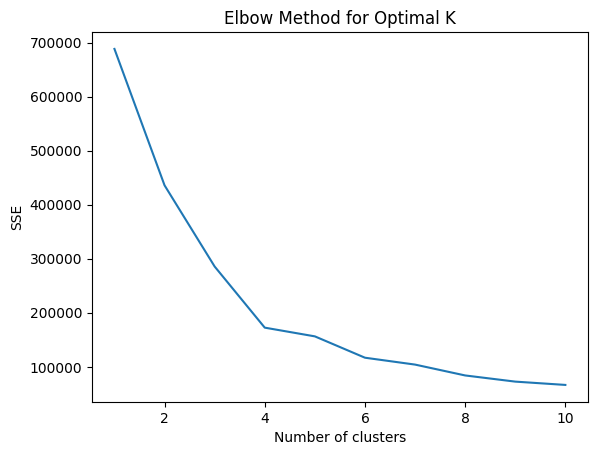

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'df' has been previously loaded and prepared with all necessary features
features = ['Balance', 'Amount', 'Unusual Time Transaction']
X = df[features].fillna(0)  # Handle potential NaNs in feature columns

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters for K-Means using the elbow method
sse = {}
for k in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse[k] = kmeans.inertia_  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Applying K-Means clustering
optimal_clusters = 4  # Set this based on the elbow plot results
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7, style=df['Cluster'])
plt.title('2D PCA of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)

# Plotting cluster centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.legend()

plt.show()

# Display cluster counts in a bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Print cluster counts
print("Cluster Counts:\n", df['Cluster'].value_counts())


ValueError: could not convert string to float: 'LBG'

In [ ]:
# Applying K-Means clustering using the optimal number of clusters observed from the elbow plot
optimal_clusters = 4  # Set this based on the elbow plot results
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Display cluster counts
print("Cluster Counts:\n", df['Cluster'].value_counts())


Cluster Counts:
 Cluster
1    170640
0     26677
3     24664
2      7458
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Adjust contamination as needed
iso_forest.fit(X_scaled)
df['Anomaly'] = iso_forest.predict(X_scaled)
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  # Mapping outliers to 1

# Display anomalies found
print("Anomalies found:", df['Anomaly'].sum())
# Optionally, inspect specific anomalies
print(df[df['Anomaly'] == 1].head())  # Display rows flagged as anomalies


Anomalies found: 11472
       Account No    Balance  Amount  Third Party Account No Third Party Name  \
912     101531259  124.00000  -859.0                     NaN              LBG   
20243   101531259  427.43795  1542.5                     NaN       Hobbycraft   
22281   101531259 -466.53205  -859.0                     NaN              LBG   
38495   101531259  713.09675  1542.5                     NaN       Hobbycraft   
40703   101531259 -203.40325  -859.0                     NaN              LBG   

       Income  Outcome   Datetime  Day of Week  Time of Day  ...  \
912       0.0    859.0 2023-01-01            6            0  ...   
20243  1542.5      0.0 2023-01-31            1            0  ...   
22281     0.0    859.0 2023-02-01            2            0  ...   
38495  1542.5      0.0 2023-02-28            1            0  ...   
40703     0.0    859.0 2023-03-01            2            0  ...   

       Unusual Time Transaction First Time Third Party  \
912                    

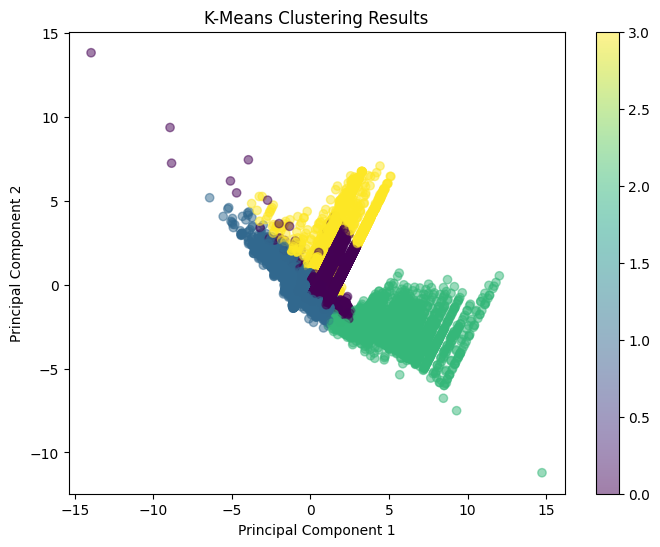

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X_scaled' is the scaled feature matrix used for clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the first two principal components colored by cluster label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


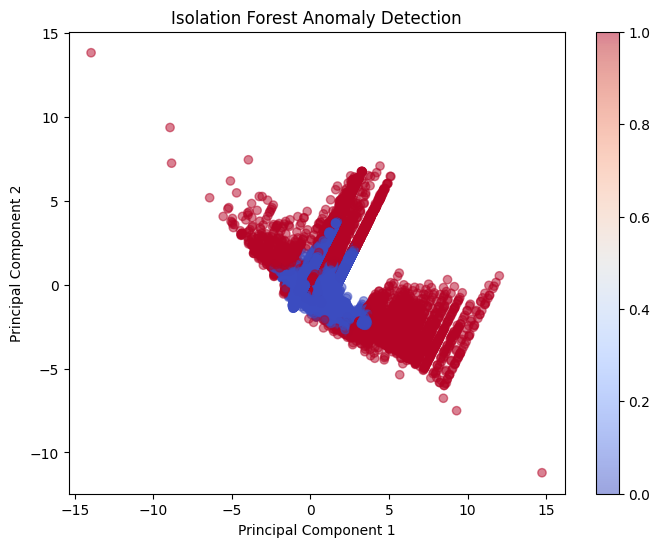

In [ ]:
# Assuming 'X_scaled' and 'df' are already prepared
plt.figure(figsize=(8, 6))
# Use the same PCA transformation
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


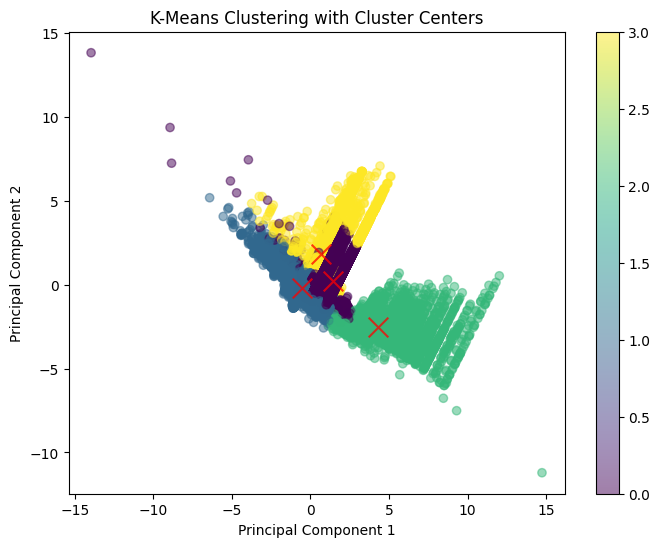

In [ ]:
# Plot the PCA-reduced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], alpha=0.5)
# Calculate the PCA of cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
# Plot the cluster centers
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()
